<a href="https://colab.research.google.com/github/AndreiAf02/Job-Satisfaction/blob/main/Job_Satisfaction_CZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install semopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 4.4 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659682 sha256=b43b778b41ce2f6d74b0a0e5c0c460bdd87988f2722897f57a1f518d85ad843c
  Stored in directory: /root/.cache/pip/wheels/c6/24/8b/be911b059a61f490f38425eb19bf2fed470a5ead97228e8255
Successfully built semopy


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import semopy
import math

## Data Preprocessing:

In [ ]:
# path_to_data = 'https://raw.githubusercontent.com/EduardoAve/Labour-well-being/refs/heads/main/data/02_processed/'
path_to_data2 = 'https://raw.githubusercontent.com/EduardoAve/Labour-well-being/refs/heads/main/data/01_raw-00/'

In [ ]:
data_total = pd.read_csv(path_to_data2+ "Final_Dataset.csv", sep=",", header=0)
data_total.columns = data_total.columns.str.replace(".","")
data_total

,Country,Version,1 Gender:,2 Age (in years):,Unnamed: 4,3 Nationality:,4 Current marital (partnership) status:,5 Do you currently care for underage children or dependent relatives?,6 The type of higher education insitution where you primarily work:,7 Subject area of the faculty (higher education institution) where you primarily work:,...,36 I tend to overwork,37 I don’t consider my work to be finished until I am completely satisfied with the result,38 My thoughts revolve around work almost exclusively,"39 When I’m unsuccessful at work, it makes me feel very down","40 If I don’t succeed at something, that just makes me all the more determined",41 I can be calm and collected in almost all situations,42 My life up till now has been characterized by professional success,"43 By and large, I am happy and content",44 I have the full support of my family,Vulnerability
0,2,4,2.0,28.0,2.0,Spanish,3.0,1.0,1.0,1.0,...,4.0,4.0,3.0,4.0,1.0,4.0,1.0,3.0,5.0,4.0
1,2,4,1.0,33.0,2.0,German,2.0,1.0,1.0,3.0,...,5.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,5.0,4.0
2,2,4,2.0,32.0,2.0,Kosovan,3.0,1.0,NaN,5.0,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,5.0,3.0
3,2,4,NaN,30.0,2.0,Spain,2.0,1.0,1.0,5.0,...,4.0,5.0,1.0,5.0,2.0,4.0,2.0,3.0,3.0,4.0
4,2,4,1.0,39.0,2.0,Italian,2.0,2.0,1.0,5.0,...,5.0,5.0,3.0,3.0,3.0,2.0,4.0,4.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,1,1,1.0,27.0,4.0,NaN,2.0,1.0,4.0,1.0,...,2.0,4.0,2.0,3.0,2.0,3.0,4.0,3.0,4.0,2.0
2743,1,1,1.0,80.0,3.0,NaN,1.0,1.0,4.0,6.0,...,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
2744,1,1,2.0,27.0,6.0,NaN,3.0,1.0,4.0,3.0,...,2.0,3.0,1.0,1.0,3.0,3.0,5.0,5.0,3.0,2.0
2745,1,1,2.0,28.0,4.0,NaN,3.0,1.0,4.0,1.0,...,5.0,4.0,4.0,4.0,3.0,3.0,3.0,1.0,4.0,NaN


In [ ]:
print(data_total.columns.tolist())

['Country', 'Version', '1 Gender:', '2 Age (in years):', 'Unnamed: 4', '3 Nationality:', '4 Current marital (partnership) status:', '5 Do you currently care for underage children or dependent relatives?', '6 The type of higher education insitution where you primarily work:', '7 Subject area of the faculty (higher education institution) where you primarily work:', '8 Duration of your current employment contract at the higher education institution where you primarily work:', '9 Extent of employment in higher education (in hours/week, aggregated for all higher education institutions where you work):', '10 Actual average weekly working hours in higher education (in a typical semester week):', 'Effort (less, more, equal)', 'Effort [%]', 'Income CZK', 'Income EURO', 'Euro Adj', 'Salary/hour', 'Salary effort/hour', '12 Do you hold a leadership position at a higher education institution?', '13 How influential are you in helping to shape key academic policies at your institution at the level of

In [ ]:
data_at_total = data_total[data_total['Country']==1].reset_index(drop=True)
data_cz_total = data_total[data_total['Country']==2].reset_index(drop=True)
data_cz_total

,Country,Version,1 Gender:,2 Age (in years):,Unnamed: 4,3 Nationality:,4 Current marital (partnership) status:,5 Do you currently care for underage children or dependent relatives?,6 The type of higher education insitution where you primarily work:,7 Subject area of the faculty (higher education institution) where you primarily work:,...,36 I tend to overwork,37 I don’t consider my work to be finished until I am completely satisfied with the result,38 My thoughts revolve around work almost exclusively,"39 When I’m unsuccessful at work, it makes me feel very down","40 If I don’t succeed at something, that just makes me all the more determined",41 I can be calm and collected in almost all situations,42 My life up till now has been characterized by professional success,"43 By and large, I am happy and content",44 I have the full support of my family,Vulnerability
0,2,4,2.0,28.0,2.0,Spanish,3.0,1.0,1.0,1.0,...,4.0,4.0,3.0,4.0,1.0,4.0,1.0,3.0,5.0,4.0
1,2,4,1.0,33.0,2.0,German,2.0,1.0,1.0,3.0,...,5.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,5.0,4.0
2,2,4,2.0,32.0,2.0,Kosovan,3.0,1.0,NaN,5.0,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,5.0,3.0
3,2,4,NaN,30.0,2.0,Spain,2.0,1.0,1.0,5.0,...,4.0,5.0,1.0,5.0,2.0,4.0,2.0,3.0,3.0,4.0
4,2,4,1.0,39.0,2.0,Italian,2.0,2.0,1.0,5.0,...,5.0,5.0,3.0,3.0,3.0,2.0,4.0,4.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,2,2,1.0,57.0,1.0,NaN,1.0,1.0,1.0,9.0,...,2.0,2.0,2.0,4.0,4.0,5.0,4.0,4.0,4.0,1.0
1415,2,2,1.0,40.0,1.0,NaN,2.0,1.0,1.0,5.0,...,2.0,4.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,2.0
1416,2,2,2.0,29.0,2.0,Slovenská republika,2.0,1.0,1.0,3.0,...,4.0,4.0,3.0,5.0,4.0,2.0,3.0,3.0,5.0,3.0
1417,2,2,2.0,50.0,1.0,NaN,1.0,1.0,1.0,9.0,...,4.0,3.0,1.0,1.0,NaN,NaN,NaN,5.0,4.0,NaN


In [ ]:
data_cz_job = data_cz_total[['2 Age (in years):',
    'CZ_15 Your current position at the higher education institution, where you primarily work: ', ## Current Position
    'Salary/hour',
    '8 Duration of your current employment contract at the higher education institution where you primarily work:', ## Contract Duration
    '10 Actual average weekly working hours in higher education (in a typical semester week):', ## Actual Weekly Working Hours
    'Effort [%]', ## Effort = actual hours/contract hours
    '1 Teaching (classroom instruction, preparation of instructional materials and lesson plans, advising students, reading and evaluating student work, examination management, etc)', ## Teaching hours
    '2 Research (reading literature, designing and conducting experiments, collecting and analysing data, writing articles or other scientific texts, etc)', ## Research Hours
    '3 Activities related to externally funded research projects (searching for information on available funding sources, preparation of grant applications and project reports, project management and administration, etc)', ## Research Admin hours
    '4 Organisational and administrative activities (organising and attending meetings, dealing with tasks and documents not directly related to teaching, research, or externally funded research projects, etc)', ## General Admin hours
    '12 Do you hold a leadership position at a higher education institution?', ## Leadership position
    '13 How influential are you in helping to shape key academic policies at your institution at the level of department or similar unit?', ## Policy Influence
    ## ACADEMIC RESOURCES:
    '1 Facilities and technological equipment (offices, classrooms, laboratories, computers, projectors, teaching software)', ## Academic Resources - FACILITIES
    '2 Research equipment (instruments, tools, materials, software for working with data)', ## Academic Resources - RESEARCH EQUIP
    '3 Availability of scientific literature (access to up-to-date scientific articles and books)', ## Academic Resources - LITERATURE
    '4 Personnel support (support from secretarial, administrative and technical staff, laboratory technicians, etc)', ## Academic Resources - SUPPORT
    '5 Opportunities for personal and professional development (offer and availability of professional courses and internships, opportunities to participate at conferences and other professional events)', ## Academic Resources - PD
    '6 Availability of resources for research funding', ## Academic Resources - FUNDING
    ## PERFORMANCE PRESSURE:
    '1 At my institution, there is a strong performance orientation',
    ## PERCEIVED AUTONOMY:
    '2 I feel like I can be myself at my job', ## KEEP ORDER
    "3 At work, I often feel like I have to follow other people’s commands", ## TO INVERT
    '4 If I could choose, I would do things at work differently', ## TO INVERT
    '5 The tasks I have to do at work are in line with what I really want to do', ## KEEP ORDER
    '6 I feel free to do my job the way I think it could best be done', ## KEEP ORDER
    '7 In my job, I feel forced to do things I do not want to do ', ## TO INVERT
    ## QUALITY OF LEADERSHIP:
    '1  makes sure that the members of staff have good development opportunities', ## KEEP ORDER
    '2  gives high priority to job satisfaction', ## KEEP ORDER
    '3  is good at work planning', ## KEEP ORDER
    '4  is good at solving conflicts ', ## KEEP ORDER
    ## SENSE OF COMMUNITY:
    '1 There is a good atmosphere between myself and my colleagues ',
    '2 There is good co-operation between the colleagues at work',
    '3 I feel part of a community at my place of work',
    ## JOB SATISFACTION:
    '1  your work prospects? ',
    '2   the physical working conditions (eg facilities, equipment, physical working environment)?',
    '3  the way your abilities are used?',
    '4  your salary?',
    '5  your job as a whole, everything taken into consideration? '
]]

In [ ]:
data_cz_job.columns.tolist()

['2 Age (in years):',
 'CZ_15 Your current position at the higher education institution, where you primarily work: ',
 'Salary/hour',
 '8 Duration of your current employment contract at the higher education institution where you primarily work:',
 '10 Actual average weekly working hours in higher education (in a typical semester week):',
 'Effort [%]',
 '1 Teaching (classroom instruction, preparation of instructional materials and lesson plans, advising students, reading and evaluating student work, examination management, etc)',
 '2 Research (reading literature, designing and conducting experiments, collecting and analysing data, writing articles or other scientific texts, etc)',
 '3 Activities related to externally funded research projects (searching for information on available funding sources, preparation of grant applications and project reports, project management and administration, etc)',
 '4 Organisational and administrative activities (organising and attending meetings, deali

In [ ]:
data_cz_job.columns = ['Age',
    'Current_position', ## Current Position
    'Salary',
    'Contract_duration', ## Contract Duration
    'Actual_hrs', ## Actual Weekly Working Hours
    'Effort', ## Effort = actual hours/contract hours
    'Teaching_hrs', ## Teaching hours
    'Research_hrs', ## Research Hours
    'External_funding_hrs', ## External Research Funding hours
    'Admin_hrs', ## General Admin hours
    'Leadership_position', ## Leadership position
    'Policy_influence', ## Policy Influence
    ## ACADEMIC RESOURCES:
    'Acad_res_facility', ## Academic Resources - FACILITIES
    'Acad_res_equip', ## Academic Resources - RESEARCH EQUIP
    'Acad_res_lit', ## Academic Resources - LITERATURE
    'Acad_res_support', ## Academic Resources - SUPPORT
    'Acad_res_PD', ## Academic Resources - PD
    'Acad_res_funding', ## Academic Resources - FUNDING
    ## PERFORMANCE PRESSURE:
    'Performance_pressure',
    ## PERCEIVED AUTONOMY:
    'Be_myself', ## KEEP ORDER
    "Follow_commands", ## TO INVERT
    'Do_differently', ## TO INVERT
    'Want_to_do', ## KEEP ORDER
    'Done_best', ## KEEP ORDER
    'Forced_to_do', ## TO INVERT
    ## QUALITY OF LEADERSHIP:
    'Development_opportunities', ## KEEP ORDER
    'Prioritizes_satisfaction', ## KEEP ORDER
    'Work_planning', ## KEEP ORDER
    'Solving_conflicts', ## KEEP ORDER
    ## SENSE OF COMMUNITY:
    'Good_atmosphere',
    'Good_cooperation',
    'Part_of_community',
    ## JOB SATISFACTION:
    'Work_prospects',
    'Physical_working_conditions',
    'Use_of_abilities',
    'Satisfaction_w_salary',
    'Overall_satisfaction']

In [ ]:
data_cz_job.columns.tolist()

['Age',
 'Current_position',
 'Salary',
 'Contract_duration',
 'Actual_hrs',
 'Effort',
 'Teaching_hrs',
 'Research_hrs',
 'External_funding_hrs',
 'Admin_hrs',
 'Leadership_position',
 'Policy_influence',
 'Acad_res_facility',
 'Acad_res_equip',
 'Acad_res_lit',
 'Acad_res_support',
 'Acad_res_PD',
 'Acad_res_funding',
 'Performance_pressure',
 'Be_myself',
 'Follow_commands',
 'Do_differently',
 'Want_to_do',
 'Done_best',
 'Forced_to_do',
 'Development_opportunities',
 'Prioritizes_satisfaction',
 'Work_planning',
 'Solving_conflicts',
 'Good_atmosphere',
 'Good_cooperation',
 'Part_of_community',
 'Work_prospects',
 'Physical_working_conditions',
 'Use_of_abilities',
 'Satisfaction_w_salary',
 'Overall_satisfaction']

In [ ]:
data_cz_job = data_cz_job.dropna(subset=['Age', 'Current_position', 'Leadership_position']).reset_index(drop=True)
for col in data_cz_job.columns:
  data_cz_job[col] = data_cz_job[col].astype(str).str.replace(',', '.').astype(float)
data_cz_job.to_csv('data_cz_job.csv')
data_cz_job

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Work_planning,Solving_conflicts,Good_atmosphere,Good_cooperation,Part_of_community,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,28.0,3.0,9.613782,2.0,50.0,125.0,5.0,29.0,1.0,15.0,...,3.0,2.0,4.0,3.0,1.0,1.0,3.0,3.0,2.0,2.0
1,33.0,3.0,4.326923,3.0,50.0,125.0,5.0,30.0,5.0,10.0,...,2.0,2.0,2.0,1.0,2.0,3.0,4.0,2.0,1.0,2.0
2,32.0,3.0,NaN,4.0,1.5,100.0,NaN,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
3,30.0,3.0,8.213535,1.0,40.0,100.0,20.0,10.0,NaN,10.0,...,1.0,1.0,5.0,1.0,3.0,3.0,4.0,3.0,1.0,3.0
4,39.0,4.0,7.931370,2.0,NaN,NaN,20.0,20.0,10.0,3.0,...,4.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,45.0,4.0,8.652404,1.0,40.0,100.0,17.0,17.0,4.0,2.0,...,3.0,3.0,4.0,3.0,3.0,3.0,2.0,3.0,1.0,4.0
1375,57.0,6.0,12.017228,2.0,40.0,100.0,18.0,6.0,1.0,9.0,...,2.0,2.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0
1376,40.0,4.0,10.334816,1.0,40.0,100.0,22.0,6.0,4.0,8.0,...,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
1377,29.0,4.0,9.613782,2.0,40.0,100.0,5.0,1.0,1.0,1.0,...,4.0,4.0,5.0,5.0,5.0,4.0,4.0,3.0,3.0,3.0


In [ ]:
np.sort(data_cz_job['Leadership_position'].unique())

array([1., 2., 3., 4.])

In [ ]:
data_cz_job

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Work_planning,Solving_conflicts,Good_atmosphere,Good_cooperation,Part_of_community,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,28.0,3.0,9.613782,2.0,50.0,125.0,5.0,29.0,1.0,15.0,...,3.0,2.0,4.0,3.0,1.0,1.0,3.0,3.0,2.0,2.0
1,33.0,3.0,4.326923,3.0,50.0,125.0,5.0,30.0,5.0,10.0,...,2.0,2.0,2.0,1.0,2.0,3.0,4.0,2.0,1.0,2.0
2,32.0,3.0,NaN,4.0,1.5,100.0,NaN,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
3,30.0,3.0,8.213535,1.0,40.0,100.0,20.0,10.0,NaN,10.0,...,1.0,1.0,5.0,1.0,3.0,3.0,4.0,3.0,1.0,3.0
4,39.0,4.0,7.931370,2.0,NaN,NaN,20.0,20.0,10.0,3.0,...,4.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,45.0,4.0,8.652404,1.0,40.0,100.0,17.0,17.0,4.0,2.0,...,3.0,3.0,4.0,3.0,3.0,3.0,2.0,3.0,1.0,4.0
1375,57.0,6.0,12.017228,2.0,40.0,100.0,18.0,6.0,1.0,9.0,...,2.0,2.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0
1376,40.0,4.0,10.334816,1.0,40.0,100.0,22.0,6.0,4.0,8.0,...,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
1377,29.0,4.0,9.613782,2.0,40.0,100.0,5.0,1.0,1.0,1.0,...,4.0,4.0,5.0,5.0,5.0,4.0,4.0,3.0,3.0,3.0


In [ ]:
## Interpolating the missing answer data using averages from each job position:
data_cz_job_interpolated = data_cz_job
data_cz_job_interpolated.columns

for i in range(len(data_cz_job_interpolated.columns)-3):
  for j in np.sort(data_cz_job_interpolated['Current_position'].unique()):
    interpolation = data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][data_cz_job_interpolated['Current_position']== j].mean()
    print('Interpolated Value:', interpolation)
    data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][(data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]].isna())
    & (data_cz_job_interpolated['Current_position']== j)] = interpolation #data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][data_cz_job_interpolated['Current_position']== j].mean()

data_cz_job_interpolated.to_csv('data_cz_job_interpolated.csv')
data_cz_job_interpolated



Interpolated Value: 9.45443935333192
Interpolated Value: 12.119191459934346
Interpolated Value: 8.903858798453669
Interpolated Value: 10.670013820928489
Interpolated Value: 15.088427304963306
Interpolated Value: 16.270299706986812
Interpolated Value: 12.592177173659687
Interpolated Value: 11.576596208324252
Interpolated Value: 12.269017434823134
Interpolated Value: 1.4169278996865204
Interpolated Value: 1.7916666666666667
Interpolated Value: 1.8131868131868132
Interpolated Value: 1.4515503875968991
Interpolated Value: 1.2
Interpolated Value: 1.2205882352941178
Interpolated Value: 2.2444444444444445
Interpolated Value: 4.0
Interpolated Value: 1.6666666666666667
Interpolated Value: 39.63915857605178
Interpolated Value: 35.46666666666667
Interpolated Value: 37.59411764705882
Interpolated Value: 41.202991452991455
Interpolated Value: 45.41265060240964
Interpolated Value: 44.24193548387097
Interpolated Value: 39.61693548387097
Interpolated Value: 11.571428571428571
Interpolated Value: 46.57

/tmp/ipython-input-3438967378.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][(data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-343

Interpolated Value: 3.660377358490566
Interpolated Value: 3.4583333333333335
Interpolated Value: 3.769230769230769
Interpolated Value: 3.6223091976516635
Interpolated Value: 3.6032608695652173
Interpolated Value: 3.323529411764706
Interpolated Value: 3.417910447761194
Interpolated Value: 3.375
Interpolated Value: 4.111111111111111
Interpolated Value: 3.4559748427672954
Interpolated Value: 3.5
Interpolated Value: 3.340659340659341
Interpolated Value: 3.3190661478599224
Interpolated Value: 3.4565217391304346
Interpolated Value: 3.7058823529411766
Interpolated Value: 3.5074626865671643
Interpolated Value: 4.0
Interpolated Value: 3.0
Interpolated Value: 3.5251572327044025
Interpolated Value: 3.5208333333333335
Interpolated Value: 3.3846153846153846
Interpolated Value: 3.4678362573099415
Interpolated Value: 3.535135135135135
Interpolated Value: 3.791044776119403
Interpolated Value: 3.6074074074074076
Interpolated Value: 3.625
Interpolated Value: 3.111111111111111
Interpolated Value: 2.73584

/tmp/ipython-input-3438967378.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][(data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-343

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Work_planning,Solving_conflicts,Good_atmosphere,Good_cooperation,Part_of_community,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,28.0,3.0,9.613782,2.0,50.000000,125.000000,5.000000,29.000000,1.000000,15.000000,...,3.0,2.0,4.0,3.0,1.0,1.0,3.0,3.0,2.0,2.0
1,33.0,3.0,4.326923,3.0,50.000000,125.000000,5.000000,30.000000,5.000000,10.000000,...,2.0,2.0,2.0,1.0,2.0,3.0,4.0,2.0,1.0,2.0
2,32.0,3.0,8.903859,4.0,1.500000,100.000000,18.960227,11.703488,2.723529,4.931034,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
3,30.0,3.0,8.213535,1.0,40.000000,100.000000,20.000000,10.000000,2.723529,10.000000,...,1.0,1.0,5.0,1.0,3.0,3.0,4.0,3.0,1.0,3.0
4,39.0,4.0,7.931370,2.0,41.202991,115.726949,20.000000,20.000000,10.000000,3.000000,...,4.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,45.0,4.0,8.652404,1.0,40.000000,100.000000,17.000000,17.000000,4.000000,2.000000,...,3.0,3.0,4.0,3.0,3.0,3.0,2.0,3.0,1.0,4.0
1375,57.0,6.0,12.017228,2.0,40.000000,100.000000,18.000000,6.000000,1.000000,9.000000,...,2.0,2.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0
1376,40.0,4.0,10.334816,1.0,40.000000,100.000000,22.000000,6.000000,4.000000,8.000000,...,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
1377,29.0,4.0,9.613782,2.0,40.000000,100.000000,5.000000,1.000000,1.000000,1.000000,...,4.0,4.0,5.0,5.0,5.0,4.0,4.0,3.0,3.0,3.0


In [ ]:
## PERCEIVED AUTONOMY:
inversion_list = ['Follow_commands', ## TO INVERT
                  'Do_differently', ## TO INVERT
                  'Forced_to_do'] ## TO INVERT

data_cz_job_w_inversion = data_cz_job_interpolated


for col in inversion_list:
  print('Before:', col, ":", np.sort(data_cz_job_w_inversion[col].unique()))
  data_cz_job_w_inversion[col] = max(data_cz_job_w_inversion[col])+1 - data_cz_job_w_inversion[col]
  print(col, ":", np.sort(data_cz_job_w_inversion[col].unique()))

data_cz_job_w_inversion.to_csv('data_cz_job_w_inversion.csv')
data_cz_job_w_inversion



Before: Follow_commands : [1.         2.         2.8423913  2.99416342 3.         3.33860759
 4.         5.        ]
Follow_commands : [1.         2.         2.66139241 3.         3.00583658 3.1576087
 4.         5.        ]
Before: Do_differently : [1.         2.         3.         3.41791045 3.60326087 3.6223092
 3.66037736 4.         5.        ]
Do_differently : [1.         2.         2.33962264 2.3776908  2.39673913 2.58208955
 3.         4.         5.        ]
Before: Forced_to_do : [1.         2.         2.73584906 2.88349515 3.         4.
 5.        ]
Forced_to_do : [1.         2.         3.         3.11650485 3.26415094 4.
 5.        ]


,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Work_planning,Solving_conflicts,Good_atmosphere,Good_cooperation,Part_of_community,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,28.0,3.0,9.613782,2.0,50.000000,125.000000,5.000000,29.000000,1.000000,15.000000,...,3.0,2.0,4.0,3.0,1.0,1.0,3.0,3.0,2.0,2.0
1,33.0,3.0,4.326923,3.0,50.000000,125.000000,5.000000,30.000000,5.000000,10.000000,...,2.0,2.0,2.0,1.0,2.0,3.0,4.0,2.0,1.0,2.0
2,32.0,3.0,8.903859,4.0,1.500000,100.000000,18.960227,11.703488,2.723529,4.931034,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
3,30.0,3.0,8.213535,1.0,40.000000,100.000000,20.000000,10.000000,2.723529,10.000000,...,1.0,1.0,5.0,1.0,3.0,3.0,4.0,3.0,1.0,3.0
4,39.0,4.0,7.931370,2.0,41.202991,115.726949,20.000000,20.000000,10.000000,3.000000,...,4.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,45.0,4.0,8.652404,1.0,40.000000,100.000000,17.000000,17.000000,4.000000,2.000000,...,3.0,3.0,4.0,3.0,3.0,3.0,2.0,3.0,1.0,4.0
1375,57.0,6.0,12.017228,2.0,40.000000,100.000000,18.000000,6.000000,1.000000,9.000000,...,2.0,2.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0
1376,40.0,4.0,10.334816,1.0,40.000000,100.000000,22.000000,6.000000,4.000000,8.000000,...,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
1377,29.0,4.0,9.613782,2.0,40.000000,100.000000,5.000000,1.000000,1.000000,1.000000,...,4.0,4.0,5.0,5.0,5.0,4.0,4.0,3.0,3.0,3.0


In [ ]:
data_cz_formatted = data_cz_job_w_inversion

data_cz_formatted = data_cz_formatted.dropna(subset = ['Overall_satisfaction']).reset_index(drop=True)


## Calculating percentage hours for teaching and research:
data_cz_formatted['Teaching_percent'] = data_cz_formatted['Teaching_hrs']/data_cz_formatted[['Teaching_hrs', 'Research_hrs',
                                                                                             'External_funding_hrs', 'Admin_hrs']].sum(axis=1)*100
data_cz_formatted['Research_percent'] = data_cz_formatted['Research_hrs']/data_cz_formatted[['Teaching_hrs', 'Research_hrs',
                                                                                             'External_funding_hrs', 'Admin_hrs']].sum(axis=1)*100
data_cz_formatted = data_cz_formatted.drop(['Teaching_hrs', 'Research_hrs', 'External_funding_hrs', 'Admin_hrs'], axis=1)


## Calculating average score for Academic Resources:
data_cz_formatted['Academic_Resources'] = data_cz_formatted[['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                                                             'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding']].mean(axis=1)
data_cz_formatted = data_cz_formatted.drop(['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                        'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding'], axis=1)


## Calculating average score for Perceived Autonomy:
data_cz_formatted['Perceived_Autonomy'] = data_cz_formatted[['Be_myself', "Follow_commands", 'Do_differently',
                                                             'Want_to_do', 'Done_best', 'Forced_to_do']].mean(axis=1)
data_cz_formatted = data_cz_formatted.drop(['Be_myself', "Follow_commands", 'Do_differently',
                        'Want_to_do', 'Done_best', 'Forced_to_do'], axis=1)


## Calculating average score for Leadership quality:
data_cz_formatted['Leadership_quality'] = data_cz_formatted[['Development_opportunities', 'Prioritizes_satisfaction',
                                                             'Work_planning', 'Solving_conflicts']].mean(axis=1)
data_cz_formatted = data_cz_formatted.drop(['Development_opportunities', 'Prioritizes_satisfaction',
                                                             'Work_planning', 'Solving_conflicts'],axis=1)


## Calculating average score for sense of community:
data_cz_formatted['Sense_of_community'] = data_cz_formatted[['Good_atmosphere', 'Good_cooperation',
                                                             'Part_of_community']].mean(axis=1)
data_cz_formatted = data_cz_formatted.drop(['Good_atmosphere', 'Good_cooperation', 'Part_of_community'], axis=1)

## Calculating average score for job satisfaction:
data_cz_formatted['Job_satisfaction'] = data_cz_formatted[['Work_prospects', 'Physical_working_conditions',
                                                           'Use_of_abilities', 'Satisfaction_w_salary',
                                                           'Overall_satisfaction']].mean(axis=1)
data_cz_formatted = data_cz_formatted.drop(['Work_prospects', 'Physical_working_conditions',
                        'Use_of_abilities', 'Satisfaction_w_salary',
                        'Overall_satisfaction'],axis=1)


data_cz_formatted.to_csv('data_cz_formatted.csv')
print(data_cz_formatted.columns.tolist())

['Age', 'Current_position', 'Salary', 'Contract_duration', 'Actual_hrs', 'Effort', 'Leadership_position', 'Policy_influence', 'Performance_pressure', 'Teaching_percent', 'Research_percent', 'Academic_Resources', 'Perceived_Autonomy', 'Leadership_quality', 'Sense_of_community', 'Job_satisfaction']


In [ ]:
data_cz_formatted

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Leadership_position,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Job_satisfaction
0,28.0,3.0,9.613782,2.0,50.000000,125.000000,1.0,1.0,1.0,10.000000,58.000000,3.166667,1.833333,3.00,2.666667,2.2
1,33.0,3.0,4.326923,3.0,50.000000,125.000000,1.0,1.0,5.0,10.000000,60.000000,3.000000,1.500000,2.00,1.666667,2.4
2,32.0,3.0,8.903859,4.0,1.500000,100.000000,1.0,3.0,4.0,49.480894,30.542834,5.000000,4.666667,5.00,5.000000,5.0
3,30.0,3.0,8.213535,1.0,40.000000,100.000000,1.0,2.0,1.0,46.812612,23.406306,2.333333,3.833333,2.00,3.000000,2.8
4,39.0,4.0,7.931370,2.0,41.202991,115.726949,1.0,2.0,5.0,37.735849,37.735849,3.500000,3.166667,3.75,3.000000,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,45.0,4.0,8.652404,1.0,40.000000,100.000000,1.0,1.0,4.0,42.500000,42.500000,3.833333,2.666667,3.75,3.333333,2.6
1373,57.0,6.0,12.017228,2.0,40.000000,100.000000,2.0,5.0,2.0,52.941176,17.647059,3.833333,4.333333,3.00,4.333333,4.0
1374,40.0,4.0,10.334816,1.0,40.000000,100.000000,3.0,4.0,4.0,55.000000,15.000000,3.833333,4.000000,3.50,4.000000,4.0
1375,29.0,4.0,9.613782,2.0,40.000000,100.000000,1.0,1.0,4.0,62.500000,12.500000,3.166667,3.500000,4.00,5.000000,3.4


In [ ]:
## Taking only academic positions:

data_cz_formatted_academic = data_cz_formatted[~data_cz_formatted['Current_position'].isin([1., 9.])]

np.sort(data_cz_formatted_academic['Current_position'].unique())

array([2., 3., 4., 5., 6., 7., 8.])

**Contract duration has 7 values, but only 5 possible responses. To remove the "Other" and leave only 1-4?**

**Similarly, Leadership position has only 3 possible responses, but 4 values. To remove 4 and leave only 1-3?**

In [ ]:
np.sort(data_cz_formatted_academic['Contract_duration'].unique())
data_cz_formatted_academic['Contract_duration'].value_counts()

,count
Contract_duration,
1.0,607
2.0,356
3.0,48
4.0,24
5.0,11
6.0,3
7.0,1


In [ ]:
data_cz_formatted_academic['Leadership_position'].value_counts()

,count
Leadership_position,
1.0,750
2.0,151
3.0,110
4.0,39


In [ ]:
## Cleaning up the outlier values in Contract Duration and Leadership position prior to creating dummy variables:
data_cz_formatted_academic = data_cz_formatted_academic[data_cz_formatted_academic['Contract_duration']<5].reset_index(drop=True)
data_cz_formatted_academic = data_cz_formatted_academic[data_cz_formatted_academic['Leadership_position']<4].reset_index(drop=True)

data_cz_formatted_academic['Contract_duration'].value_counts()

,count
Contract_duration,
1.0,576
2.0,349
3.0,48
4.0,24


In [ ]:
data_cz_formatted_academic['Leadership_position'].value_counts()

,count
Leadership_position,
1.0,740
2.0,148
3.0,109


In [ ]:
data_cz_formatted_academic.to_csv('data_cz_formatted_academic.csv')
data_cz_formatted_academic

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Leadership_position,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Job_satisfaction
0,28.0,3.0,9.613782,2.0,50.000000,125.000000,1.0,1.0,1.0,10.000000,58.000000,3.166667,1.833333,3.00,2.666667,2.2
1,33.0,3.0,4.326923,3.0,50.000000,125.000000,1.0,1.0,5.0,10.000000,60.000000,3.000000,1.500000,2.00,1.666667,2.4
2,32.0,3.0,8.903859,4.0,1.500000,100.000000,1.0,3.0,4.0,49.480894,30.542834,5.000000,4.666667,5.00,5.000000,5.0
3,30.0,3.0,8.213535,1.0,40.000000,100.000000,1.0,2.0,1.0,46.812612,23.406306,2.333333,3.833333,2.00,3.000000,2.8
4,39.0,4.0,7.931370,2.0,41.202991,115.726949,1.0,2.0,5.0,37.735849,37.735849,3.500000,3.166667,3.75,3.000000,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,45.0,4.0,8.652404,1.0,40.000000,100.000000,1.0,1.0,4.0,42.500000,42.500000,3.833333,2.666667,3.75,3.333333,2.6
993,57.0,6.0,12.017228,2.0,40.000000,100.000000,2.0,5.0,2.0,52.941176,17.647059,3.833333,4.333333,3.00,4.333333,4.0
994,40.0,4.0,10.334816,1.0,40.000000,100.000000,3.0,4.0,4.0,55.000000,15.000000,3.833333,4.000000,3.50,4.000000,4.0
995,29.0,4.0,9.613782,2.0,40.000000,100.000000,1.0,1.0,4.0,62.500000,12.500000,3.166667,3.500000,4.00,5.000000,3.4


In [ ]:
## Creating dummy variables for the categorical variables Current Position, Contract Duration, and Leadership Position:

data_cz_formatted_academic_w_dummies = pd.get_dummies(data_cz_formatted_academic, columns = ['Current_position', 'Contract_duration', 'Leadership_position'])

# print(data_cz_formatted_academic_w_dummies[data_cz_formatted_academic_w_dummies.isna().any(axis=1)])

data_cz_formatted_academic_w_dummies = data_cz_formatted_academic_w_dummies.dropna().reset_index(drop=True)

data_cz_formatted_academic_w_dummies = data_cz_formatted_academic_w_dummies.astype(float)

## Calculating the interaction terms for Age moderator:
for col in data_cz_formatted_academic_w_dummies.columns:
  data_cz_formatted_academic_w_dummies[col+'_mod_Age'] = data_cz_formatted_academic_w_dummies[col] * data_cz_formatted_academic_w_dummies['Age']

data_cz_formatted_academic_w_dummies = data_cz_formatted_academic_w_dummies.drop(['Age_mod_Age'], axis=1)

data_cz_formatted_academic_w_dummies.to_csv('data_cz_formatted_academic_w_dummies.csv')

print(data_cz_formatted_academic_w_dummies.columns.tolist())
print(np.shape(data_cz_formatted_academic_w_dummies))

['Age', 'Salary', 'Actual_hrs', 'Effort', 'Policy_influence', 'Performance_pressure', 'Teaching_percent', 'Research_percent', 'Academic_Resources', 'Perceived_Autonomy', 'Leadership_quality', 'Sense_of_community', 'Job_satisfaction', 'Current_position_2.0', 'Current_position_3.0', 'Current_position_4.0', 'Current_position_5.0', 'Current_position_6.0', 'Current_position_7.0', 'Current_position_8.0', 'Contract_duration_1.0', 'Contract_duration_2.0', 'Contract_duration_3.0', 'Contract_duration_4.0', 'Leadership_position_1.0', 'Leadership_position_2.0', 'Leadership_position_3.0', 'Salary_mod_Age', 'Actual_hrs_mod_Age', 'Effort_mod_Age', 'Policy_influence_mod_Age', 'Performance_pressure_mod_Age', 'Teaching_percent_mod_Age', 'Research_percent_mod_Age', 'Academic_Resources_mod_Age', 'Perceived_Autonomy_mod_Age', 'Leadership_quality_mod_Age', 'Sense_of_community_mod_Age', 'Job_satisfaction_mod_Age', 'Current_position_2.0_mod_Age', 'Current_position_3.0_mod_Age', 'Current_position_4.0_mod_Age',

<Axes: >

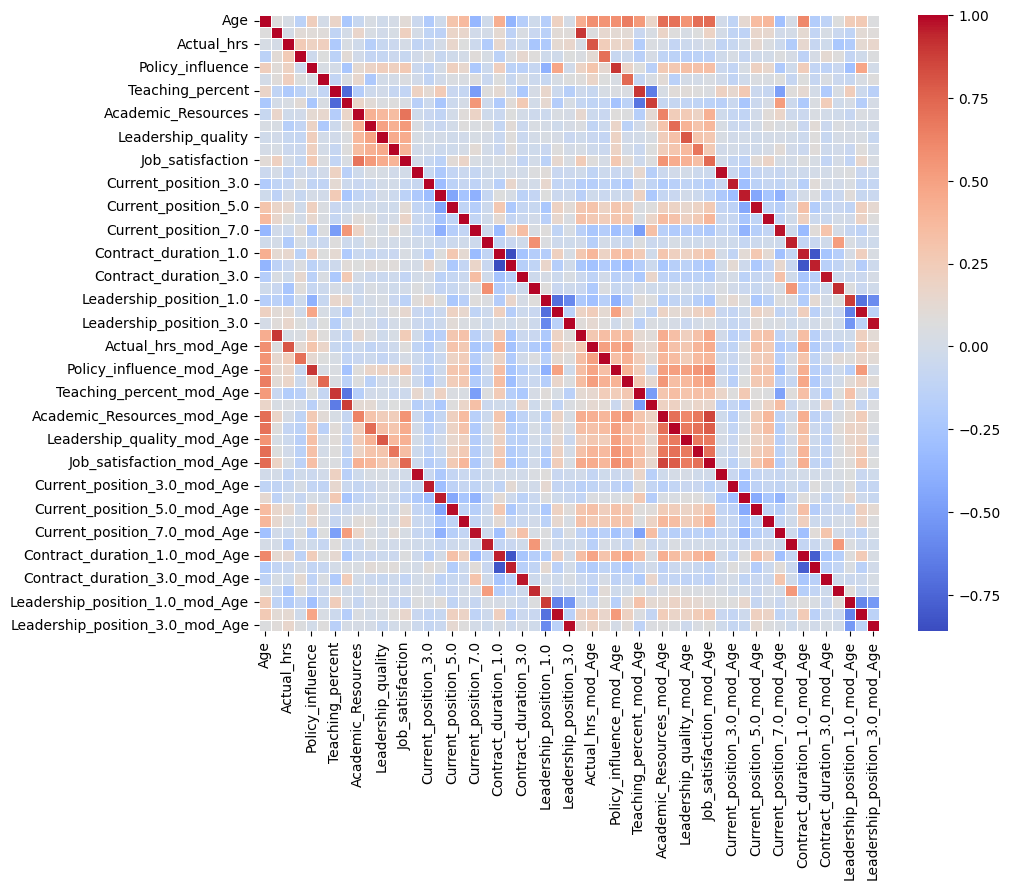

In [95]:
correlations = data_cz_formatted_academic_w_dummies.corr()

plt.figure(figsize=(10, 8)) # Adjust figure size for better readability
sns.heatmap(
    correlations,
    annot=False,     # Display the correlation values on the heatmap
    cmap='coolwarm', # Use a diverging color palette for better contrast
    fmt=".2f",      # Format the annotations to two decimal places
    linewidths=.5   # Add lines to separate the cells
)

## Calculating Cronbach's Alpha for the combined factors:

In [ ]:
def Cronbach_alpha_func(data, label):
  col_nr = data.shape[1]

  item_variances = np.var(data, axis=0, ddof=1)
  total_var = np.var(np.sum(data, axis=1), ddof=1)
  alpha_cronbach = (col_nr/(col_nr-1))*(1-(np.sum(item_variances)/total_var))

  print(f'{label} Cronbach Alpha:', alpha_cronbach)
  return alpha_cronbach

In [ ]:
## Academic Resources:

data_cz_for_alpha_academic = data_cz_job_w_inversion[(~data_cz_job_w_inversion['Current_position'].isin([1., 9.])) &
                                                     (data_cz_job_w_inversion['Contract_duration']<5) &
                                                     (data_cz_job_w_inversion['Leadership_position']<4)].dropna()

print(len(data_cz_for_alpha_academic))

# data_cz_for_alpha_academic = data_cz_for_alpha_academic.dropna(subset=['Teaching_percent'])

academic_resources_for_alpha = np.asarray(data_cz_for_alpha_academic[['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                         'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding']])

perceived_autonomy_for_alpha = np.asarray(data_cz_for_alpha_academic[['Be_myself', "Follow_commands", 'Do_differently',
                                                             'Want_to_do', 'Done_best', 'Forced_to_do']])

leadership_quality_for_alpha = np.asarray(data_cz_for_alpha_academic[['Development_opportunities', 'Prioritizes_satisfaction',
                                                             'Work_planning', 'Solving_conflicts']])

sense_of_community_for_alpha = np.asarray(data_cz_for_alpha_academic[['Good_atmosphere', 'Good_cooperation', 'Part_of_community']])

job_satisfaction_for_alpha = np.asarray(data_cz_for_alpha_academic[['Work_prospects', 'Physical_working_conditions',
                                                                      'Use_of_abilities', 'Satisfaction_w_salary',
                                                                      'Overall_satisfaction']])


acad_res_cron_alpha = Cronbach_alpha_func(academic_resources_for_alpha, 'Academic Resources')
perc_auton_cron_alpha = Cronbach_alpha_func(perceived_autonomy_for_alpha, 'Perceived Autonomy')
lead_qual_cron_alpha = Cronbach_alpha_func(leadership_quality_for_alpha, 'Leadership Quality')
sens_comm_cron_alpha = Cronbach_alpha_func(sense_of_community_for_alpha, 'Sense of Community')
print('---------------------')
job_sat_cron_alpha = Cronbach_alpha_func(job_satisfaction_for_alpha, 'Job Satisfaction')





997
Academic Resources Cronbach Alpha: 0.7900718657367718
Perceived Autonomy Cronbach Alpha: 0.8646009186918968
Leadership Quality Cronbach Alpha: 0.9177965181848169
Sense of Community Cronbach Alpha: 0.8661912016655378
---------------------
Job Satisfaction Cronbach Alpha: 0.7765945808409941


## Structural Equation Modelling:

We study the relationship between academic position and job satisfaction, mediated by working conditions and moderated by age.

In [ ]:
## Taking the response variable (Job satisfaction), the moderator variable (Age), and the predictor variable(s) (Current Position):
Job_satisfaction_col = ['Job_satisfaction']
Age_col = ['Age']
Current_position_dummy_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if 'Current_position' in col and 'mod_Age' not in col]

## Taking the moderation coefficients separately:
Moderation_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if 'mod_Age' in col]

## Taking the remaining variables for working conditions:
Working_condition_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if col not in Job_satisfaction_col+Age_col+Current_position_dummy_cols+Moderation_cols]

Working_condition_cols

['Salary',
 'Actual_hrs',
 'Effort',
 'Policy_influence',
 'Performance_pressure',
 'Teaching_percent',
 'Research_percent',
 'Academic_Resources',
 'Perceived_Autonomy',
 'Leadership_quality',
 'Sense_of_community',
 'Contract_duration_1.0',
 'Contract_duration_2.0',
 'Contract_duration_3.0',
 'Contract_duration_4.0',
 'Leadership_position_1.0',
 'Leadership_position_2.0',
 'Leadership_position_3.0']

In [ ]:
Moderation_cols

['Salary_mod_Age',
 'Actual_hrs_mod_Age',
 'Effort_mod_Age',
 'Policy_influence_mod_Age',
 'Performance_pressure_mod_Age',
 'Teaching_percent_mod_Age',
 'Research_percent_mod_Age',
 'Academic_Resources_mod_Age',
 'Perceived_Autonomy_mod_Age',
 'Leadership_quality_mod_Age',
 'Sense_of_community_mod_Age',
 'Job_satisfaction_mod_Age',
 'Current_position_2.0_mod_Age',
 'Current_position_3.0_mod_Age',
 'Current_position_4.0_mod_Age',
 'Current_position_5.0_mod_Age',
 'Current_position_6.0_mod_Age',
 'Current_position_7.0_mod_Age',
 'Current_position_8.0_mod_Age',
 'Contract_duration_1.0_mod_Age',
 'Contract_duration_2.0_mod_Age',
 'Contract_duration_3.0_mod_Age',
 'Contract_duration_4.0_mod_Age',
 'Leadership_position_1.0_mod_Age',
 'Leadership_position_2.0_mod_Age',
 'Leadership_position_3.0_mod_Age']

In [100]:
Current_position_factors = " + ".join(Current_position_dummy_cols)
Working_condition_factors = " + ".join(Working_condition_cols)
Moderation_factors = " + ".join(Moderation_cols)

# path = f"""
# Salary ~ {Current_position_factors}
# """



path = f"""
Salary ~ {Current_position_factors}
Actual_hrs ~ {Current_position_factors}
Effort ~ {Current_position_factors}
Policy_influence ~ {Current_position_factors}
Performance_pressure ~ {Current_position_factors}
Teaching_percent ~ {Current_position_factors}
Research_percent ~ {Current_position_factors}
Academic_Resources ~ {Current_position_factors}
Perceived_Autonomy ~ {Current_position_factors}
Leadership_quality ~ {Current_position_factors}
Sense_of_community ~ {Current_position_factors}
Contract_duration_1.0 ~ {Current_position_factors}
Contract_duration_2.0 ~ {Current_position_factors}
Contract_duration_3.0 ~ {Current_position_factors}
Contract_duration_4.0 ~ {Current_position_factors}
Leadership_position_1.0 ~ {Current_position_factors}
Leadership_position_2.0 ~ {Current_position_factors}
Leadership_position_3.0 ~ {Current_position_factors}
Job_satisfaction ~ {Working_condition_factors} + {Current_position_factors} + {Moderation_factors}
"""


In [101]:
model = semopy.Model(path)
result = model.fit(data_cz_formatted_academic_w_dummies)
print(result)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 53.796
Number of iterations: 614
Params: 0.041 -3.188 -1.301 2.537 4.063 -0.668 -0.387 -1.300 1.414 5.031 9.409 8.399 3.348 -23.605 -0.315 8.772 -0.068 0.265 4.518 12.835 -6.663 -0.274 -0.394 0.022 0.571 0.676 -0.687 -0.530 -0.058 -0.365 -0.019 0.106 0.155 0.164 -0.672 25.097 12.570 9.663 -0.131 -4.541 -27.773 24.972 -18.159 -6.042 -8.200 -5.082 -2.531 29.425 -8.274 -0.113 -0.172 -0.105 -0.035 0.236 0.343 -0.286 0.115 -0.129 -0.073 -0.027 0.224 0.087 0.547 0.132 -0.036 -0.004 -0.056 -0.048 0.071 0.098 -0.066 -0.037 -0.055 -0.070 0.016 0.258 -0.086 -0.044 -0.236 0.044 0.319 0.243 -0.394 -0.565 0.020 0.241 0.013 -0.241 -0.174 0.205 -0.349 -0.012 0.002 -0.037 -0.049 -0.055 0.179 -0.055 0.036 -0.007 -0.020 -0.030 -0.014 0.009 0.970 0.175 0.206 0.033 -0.225 -0.245 0.099 0.262 -0.108 -0.117 -0.021 0.155 0.197 -0.113 -0.151 -0.067 -0.088 -0.012 0.070 0.048 0.014 -0.

In [102]:
ins = model.inspect()
print(ins)
ins.to_csv('Model Parameter Values.csv')

                   lval  op                  rval    Estimate   Std. Err  \
0                Salary   ~  Current_position_2.0    0.040758   2.969037   
1                Salary   ~  Current_position_3.0   -3.187916   2.876067   
2                Salary   ~  Current_position_4.0   -1.301342   2.802616   
3                Salary   ~  Current_position_5.0    2.537422   2.829372   
4                Salary   ~  Current_position_6.0    4.063410   2.916969   
..                  ...  ..                   ...         ...        ...   
191    Research_percent  ~~      Research_percent  333.221088  14.931994   
192              Salary  ~~                Salary   53.391150   2.392515   
193  Sense_of_community  ~~    Sense_of_community    0.900790   0.040365   
194    Teaching_percent  ~~      Teaching_percent  431.746662  19.347031   
195    Job_satisfaction  ~~      Job_satisfaction    0.025521   0.001144   

       z-value   p-value  
0     0.013728  0.989047  
1    -1.108429  0.267677  
2    -

In [103]:
ins[ins['p-value']<0.05]

,lval,op,rval,Estimate,Std. Err,z-value,p-value
13,Actual_hrs,~,Current_position_8.0,-23.605072,6.641623,-3.554112,3.792580e-04
35,Teaching_percent,~,Current_position_2.0,25.097185,8.442975,2.972552,2.953350e-03
40,Teaching_percent,~,Current_position_7.0,-27.772978,8.089254,-3.433318,5.962430e-04
41,Teaching_percent,~,Current_position_8.0,24.972125,10.760384,2.320747,2.030052e-02
42,Research_percent,~,Current_position_2.0,-18.159345,7.417324,-2.448234,1.435584e-02
47,Research_percent,~,Current_position_7.0,29.424713,7.106573,4.140493,3.465605e-05
82,Contract_duration_1.0,~,Current_position_7.0,-0.393613,0.171899,-2.289794,2.203327e-02
83,Contract_duration_1.0,~,Current_position_8.0,-0.564862,0.228661,-2.470305,1.349978e-02
96,Contract_duration_3.0,~,Current_position_7.0,0.179431,0.077464,2.316324,2.054056e-02
104,Contract_duration_4.0,~,Current_position_8.0,0.970237,0.064605,15.017997,0.000000e+00


In [104]:
ins

# Current_position_dummy_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if 'Current_position' in col and 'mod_Age' not in col]
# Moderation_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if 'mod_Age' in col]
# Working_condition_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if col not in Job_satisfaction_col+Age_col+Current_position_dummy_cols+Moderation_cols]

## Saving the Job Position pathway coefficients for the SEM:
job_pos_paths = pd.DataFrame()
job_pos_paths['lval'] = ins['lval'][ins['rval']==Current_position_dummy_cols[0]]

for curr_pos in Current_position_dummy_cols:
  job_pos_paths = pd.merge(job_pos_paths, ins[['lval', 'Estimate']][ins['rval']==curr_pos], on='lval', how='left')
  job_pos_paths.rename(columns={job_pos_paths.columns[-1]: curr_pos}, inplace=True)

job_pos_paths


## Saving the Working Conditions pathway coefficients for the SEM:
work_cond_paths = pd.DataFrame()
work_cond_paths['lval'] = [ins['lval'][ins['rval']==Working_condition_cols[0]].iloc[0]]

for work_cond in Working_condition_cols:
  work_cond_paths = pd.merge(work_cond_paths, ins[['lval', 'Estimate']][ins['rval']==work_cond], on='lval', how='left')
  work_cond_paths.rename(columns={work_cond_paths.columns[-1]: work_cond}, inplace=True)

work_cond_paths


# ## Saving the moderator pathway coefficients for the SEM:
mod_age_paths = pd.DataFrame()
mod_age_paths['lval'] = [ins['lval'][ins['rval']==Moderation_cols[0]].iloc[0]]

for mod_age in Moderation_cols:
  mod_age_paths = pd.merge(mod_age_paths, ins[['lval', 'Estimate']][ins['rval']==mod_age], on='lval', how='left')
  mod_age_paths.rename(columns={mod_age_paths.columns[-1]: mod_age}, inplace=True)


job_pos_paths



,lval,Current_position_2.0,Current_position_3.0,Current_position_4.0,Current_position_5.0,Current_position_6.0,Current_position_7.0,Current_position_8.0
0,Salary,0.040758,-3.187916,-1.301342,2.537422,4.063410,-0.668397,-0.386911
1,Actual_hrs,-1.299708,1.413643,5.030792,9.409402,8.398541,3.347612,-23.605072
2,Effort,-0.315253,8.771935,-0.068074,0.265385,4.517970,12.835499,-6.662748
3,Policy_influence,-0.274457,-0.393676,0.021556,0.571400,0.675746,-0.686627,-0.530163
4,Performance_pressure,-0.057977,-0.365337,-0.018869,0.106117,0.155299,0.164099,-0.672030
5,Teaching_percent,25.097185,12.570042,9.663185,-0.130760,-4.541194,-27.772978,24.972125
6,Research_percent,-18.159345,-6.042407,-8.200308,-5.081659,-2.530662,29.424713,-8.274135
7,Academic_Resources,-0.113480,-0.172012,-0.105341,-0.035469,0.236187,0.342955,-0.286289
8,Perceived_Autonomy,0.115124,-0.128744,-0.073232,-0.026792,0.224384,0.086677,0.547372
9,Leadership_quality,0.132203,-0.036308,-0.004300,-0.055987,-0.047808,0.071403,0.097566


In [105]:
mod_age_paths

,lval,Salary_mod_Age,Actual_hrs_mod_Age,Effort_mod_Age,Policy_influence_mod_Age,Performance_pressure_mod_Age,Teaching_percent_mod_Age,Research_percent_mod_Age,Academic_Resources_mod_Age,Perceived_Autonomy_mod_Age,...,Current_position_6.0_mod_Age,Current_position_7.0_mod_Age,Current_position_8.0_mod_Age,Contract_duration_1.0_mod_Age,Contract_duration_2.0_mod_Age,Contract_duration_3.0_mod_Age,Contract_duration_4.0_mod_Age,Leadership_position_1.0_mod_Age,Leadership_position_2.0_mod_Age,Leadership_position_3.0_mod_Age
0,Job_satisfaction,-0.000312,-0.00002,0.00002,-0.000737,-0.001272,-0.00006,-0.000006,-0.006183,-0.003785,...,-0.003151,-0.001901,-0.002967,-0.001965,-0.00337,0.002578,-0.006392,-0.000603,-0.00476,-0.004117


In [106]:
med_mod_path_values = pd.DataFrame(columns = ['Current_position']+Working_condition_cols)

for curr_pos in Current_position_dummy_cols:
  path_coeff = [curr_pos]
  for work_cond in Working_condition_cols:
    path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
                      (ins['lval']==work_cond)].iloc[0]) * float(ins['Estimate'][(ins['rval']==work_cond) &
                       (ins['lval']=='Job_satisfaction')].iloc[0]))
  med_mod_path_values.loc[len(med_mod_path_values)] = path_coeff
med_mod_path_values

,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_1.0,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_4.0,Leadership_position_1.0,Leadership_position_2.0,Leadership_position_3.0
0,Current_position_2.0,0.000547,-0.000516,0.000294,-0.007767,-0.003186,0.048612,-0.002452,-0.035709,0.019672,0.013469,-0.008826,0.000041,0.000614,0.002986,0.007513,-0.018374,-0.011397,-0.004635
1,Current_position_3.0,-0.042818,0.000561,-0.008182,-0.011141,-0.020078,0.024347,-0.000816,-0.054127,-0.021999,-0.003699,-0.004920,0.000216,0.007329,-0.000467,-0.001449,-0.021528,-0.012389,-0.006061
2,Current_position_4.0,-0.017479,0.001998,0.000063,0.000610,-0.001037,0.018717,-0.001107,-0.033148,-0.012514,-0.000438,-0.007402,-0.000040,0.000391,0.009570,-0.004126,-0.003491,-0.002207,-0.000854
3,Current_position_5.0,0.034081,0.003737,-0.000248,0.016171,0.005832,-0.000253,-0.000686,-0.011161,-0.004578,-0.005704,-0.009389,-0.000292,-0.007310,0.012693,-0.006244,0.023558,0.016390,0.004787
4,Current_position_6.0,0.054577,0.003336,-0.004214,0.019124,0.008535,-0.008796,-0.000342,0.074321,0.038342,-0.004871,0.002103,-0.000222,-0.005295,0.014239,-0.002891,0.025627,0.020798,0.003273
5,Current_position_7.0,-0.008978,0.001330,-0.011972,-0.019432,0.009018,-0.053795,0.003973,0.107918,0.014811,0.007275,0.034543,0.000361,0.006232,-0.046472,0.001997,-0.010317,-0.011868,0.000961
6,Current_position_8.0,-0.005197,-0.009376,0.006215,-0.015004,-0.036933,0.048370,-0.001117,-0.090087,0.093534,0.009940,-0.011503,0.000518,-0.010592,0.014246,0.204612,-0.027457,-0.015971,-0.007618


## Bootstrapping:

<Axes: >

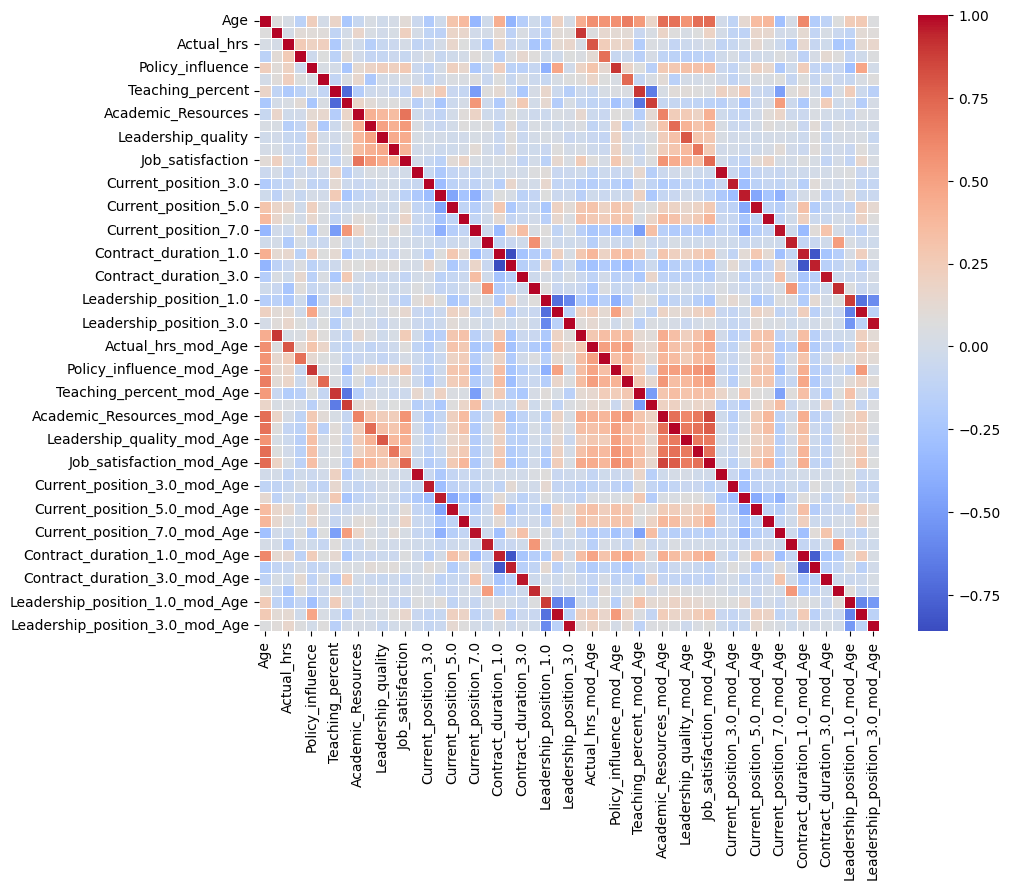

In [107]:
correlations = data_cz_formatted_academic_w_dummies.corr()

plt.figure(figsize=(10, 8)) # Adjust figure size for better readability
sns.heatmap(
    correlations,
    annot=False,     # Display the correlation values on the heatmap
    cmap='coolwarm', # Use a diverging color palette for better contrast
    fmt=".2f",      # Format the annotations to two decimal places
    linewidths=.5   # Add lines to separate the cells
)

In [153]:
times = 200

bootstrap_path_values = pd.DataFrame(columns = ['Bootstrap_nr', 'Current_position']+Working_condition_cols)

for i in range(times):
  data_cz_bootstrapped = data_cz_formatted_academic_w_dummies.sample(n=len(data_cz_formatted_academic_w_dummies), replace=True).reset_index(drop=True)

  model = semopy.Model(path)
  result = model.fit(data_cz_bootstrapped)
  ins = model.inspect()

  for curr_pos in Current_position_dummy_cols:
    path_coeff = [i, curr_pos]
    for work_cond in Working_condition_cols:
      path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
                        (ins['lval']==work_cond)].iloc[0]) * float(ins['Estimate'][(ins['rval']==work_cond) &
                        (ins['lval']=='Job_satisfaction')].iloc[0]))
    bootstrap_path_values.loc[len(bootstrap_path_values)] = path_coeff


bootstrap_path_values

,Bootstrap_nr,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_1.0,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_4.0,Leadership_position_1.0,Leadership_position_2.0,Leadership_position_3.0
0,0,Current_position_2.0,0.041395,-0.000338,0.003354,-0.011875,-0.004929,0.071772,-0.013778,-0.094717,0.008330,-0.013008,-0.002679,0.001955,-0.001032,0.001784,0.009960,-0.021349,-0.019210,0.000349
1,0,Current_position_3.0,-0.040553,0.000464,-0.004306,-0.010800,-0.018166,0.033367,-0.003495,-0.065457,0.002860,0.002583,0.017261,0.011853,0.021620,0.008718,-0.001037,-0.022945,-0.023371,0.000290
2,0,Current_position_4.0,-0.024644,0.000823,-0.000762,0.000914,0.000923,0.029929,-0.006475,-0.008163,-0.008372,0.017252,-0.003352,-0.001785,0.001837,0.009095,-0.002512,-0.002656,-0.002463,0.000041
3,0,Current_position_5.0,0.011180,0.001365,-0.000677,0.014681,-0.000291,0.007165,-0.002702,-0.037241,-0.004411,-0.030694,-0.022511,-0.015787,-0.017664,0.010961,-0.004590,0.021187,0.021543,-0.000269
4,0,Current_position_6.0,0.024882,0.001000,-0.003937,0.023524,0.007533,0.001581,-0.001905,0.057010,0.017853,-0.004030,-0.019791,-0.009802,-0.010525,0.010953,-0.000511,0.032352,0.043129,-0.000091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,199,Current_position_4.0,-0.013718,-0.003394,0.001383,0.004344,0.000238,0.015594,-0.006909,-0.038652,-0.018195,-0.001876,-0.012040,0.001988,-0.000954,0.012665,-0.003161,-0.003263,-0.002064,-0.000695
1396,199,Current_position_5.0,0.025930,-0.004895,0.006834,0.022383,0.000109,-0.000420,-0.004250,-0.001663,0.013494,-0.001052,-0.000026,0.006062,-0.006025,0.014799,-0.003937,0.024598,0.020547,0.003305
1397,199,Current_position_6.0,0.041312,-0.004537,0.003493,0.025462,0.004329,-0.008285,-0.001053,0.043731,0.039375,-0.012930,0.002015,0.004012,-0.003834,0.016919,-0.000721,0.014370,0.012868,0.001599
1398,199,Current_position_7.0,0.007909,-0.001264,-0.004976,-0.032279,0.007757,-0.042351,0.026154,0.090795,-0.000285,0.000919,0.019292,-0.007877,0.005339,-0.062443,0.000879,-0.006737,-0.011312,0.001264


In [154]:
bootstrap_path_values.to_csv('bootstrap_path_values.csv')

Analyzing the bootstrap results:

In [156]:
mean_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols)
stdev_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols)
## Calculating the number of standard deviations of the mean to determine significance:
nr_sd_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols)

for curr_pos in Current_position_dummy_cols:
  data = bootstrap_path_values[bootstrap_path_values['Current_position'].isin([curr_pos])].reset_index(drop=True)
  mean_vals = [curr_pos]
  stdev_vals = [curr_pos]
  nr_sd_vals = [curr_pos]
  for col in data.iloc[:, 2:]:
    mean_vals.append(data[col].mean())
    stdev_vals.append(data[col].std())

    ## Calculating the number of standard deviations for mean significance estimation (abs value > 2 is statistically significant):
    mean_estimate_stdev = np.sqrt(data[col].var()/len(data))
    nr_of_sd = data[col].mean()/mean_estimate_stdev
    nr_sd_vals.append(nr_of_sd)

  mean_results.loc[len(mean_results)] = mean_vals
  stdev_results.loc[len(stdev_results)] = stdev_vals
  nr_sd_results.loc[len(nr_sd_results)] = nr_sd_vals

mean_results


,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_1.0,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_4.0,Leadership_position_1.0,Leadership_position_2.0,Leadership_position_3.0
0,Current_position_2.0,-0.000717,-0.000127,0.001251,-0.009138,-0.004141,0.043633,-0.005564,-0.030526,0.020238,0.013975,-0.007362,-0.000141,0.000675,0.003248,0.006196,-0.017118,-0.010246,-0.004623
1,Current_position_3.0,-0.041510,0.000212,-0.003397,-0.013096,-0.020165,0.021537,-0.001799,-0.049967,-0.020900,-0.002049,-0.004045,-0.000946,0.007085,-0.000171,-0.000958,-0.020254,-0.011418,-0.005810
2,Current_position_4.0,-0.016839,0.000599,0.001499,0.000585,-0.001108,0.017045,-0.002266,-0.031438,-0.012455,-0.000853,-0.007788,0.000189,0.000424,0.010315,-0.003748,-0.003486,-0.002103,-0.001034
3,Current_position_5.0,0.033731,0.001003,0.000800,0.019010,0.005845,0.000066,-0.001279,-0.011566,-0.004358,-0.006687,-0.010039,0.001404,-0.007151,0.014083,-0.005910,0.022072,0.014826,0.005114
4,Current_position_6.0,0.054280,0.000734,-0.000481,0.023262,0.009568,-0.007711,-0.000921,0.068632,0.035251,-0.005584,0.001843,0.001101,-0.005150,0.015419,-0.002926,0.025689,0.020044,0.003276
5,Current_position_7.0,-0.009483,0.000638,-0.007005,-0.023019,0.008912,-0.047163,0.008657,0.101969,0.014882,0.008177,0.035693,-0.001760,0.006062,-0.050781,0.001866,-0.010001,-0.010949,0.000751
6,Current_position_8.0,-0.005432,-0.001125,-0.004151,-0.018203,-0.037492,0.041231,-0.003361,-0.084784,0.092097,0.012199,-0.010278,-0.002433,-0.010485,0.015429,0.190886,-0.026102,-0.014654,-0.007731


In [157]:
stdev_results

,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_1.0,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_4.0,Leadership_position_1.0,Leadership_position_2.0,Leadership_position_3.0
0,Current_position_2.0,0.032906,0.005237,0.005839,0.007601,0.008982,0.017209,0.018535,0.029250,0.021464,0.016296,0.018605,0.002299,0.002980,0.007838,0.007333,0.007320,0.006717,0.004672
1,Current_position_3.0,0.010867,0.004170,0.004584,0.007017,0.009089,0.009625,0.006248,0.024667,0.015000,0.013813,0.013510,0.006897,0.007542,0.007152,0.003417,0.006791,0.006365,0.004714
2,Current_position_4.0,0.006977,0.006669,0.002583,0.001636,0.002333,0.006866,0.008224,0.009655,0.005768,0.005504,0.005424,0.001321,0.000854,0.004213,0.001951,0.002062,0.002053,0.001374
3,Current_position_5.0,0.015683,0.012425,0.002821,0.009669,0.004577,0.003757,0.004895,0.015775,0.009597,0.008833,0.009143,0.009132,0.007416,0.006241,0.002711,0.008276,0.008866,0.004837
4,Current_position_6.0,0.021262,0.011331,0.003641,0.012627,0.008016,0.006135,0.003070,0.024233,0.019218,0.015224,0.015891,0.006785,0.005668,0.005779,0.003735,0.011465,0.013627,0.004158
5,Current_position_7.0,0.013132,0.004916,0.007324,0.011367,0.005546,0.017499,0.030602,0.019311,0.011393,0.009773,0.011226,0.011183,0.006744,0.020964,0.003398,0.004930,0.006468,0.002356
6,Current_position_8.0,0.015554,0.036632,0.012451,0.012846,0.033562,0.028715,0.015030,0.068948,0.053209,0.043097,0.044395,0.016190,0.010844,0.005782,0.080712,0.008360,0.007989,0.006355


In [158]:
nr_sd_results

,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_1.0,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_4.0,Leadership_position_1.0,Leadership_position_2.0,Leadership_position_3.0
0,Current_position_2.0,-0.308092,-0.341946,3.030409,-17.003182,-6.519172,35.857740,-4.245250,-14.758866,13.334604,12.128003,-5.595965,-0.864666,3.204389,5.860664,11.948753,-33.071836,-21.571865,-13.993989
1,Current_position_3.0,-54.018887,0.717767,-10.481061,-26.394418,-31.375293,31.644939,-4.073027,-28.647211,-19.704209,-2.097421,-4.233733,-1.940136,13.285070,-0.338408,-3.966610,-42.178424,-25.369496,-17.428732
2,Current_position_4.0,-34.130335,1.269680,8.205044,5.061044,-6.712918,35.108093,-3.896181,-46.050097,-30.539815,-2.190864,-20.307024,2.019464,7.024331,34.625382,-27.171985,-23.907255,-14.484925,-10.647738
3,Current_position_5.0,30.416746,1.141116,4.008973,27.804192,18.061037,0.246820,-3.695072,-10.368389,-6.422598,-10.706293,-15.529277,2.174603,-13.635851,31.910682,-30.833047,37.715302,23.648182,14.952076
4,Current_position_6.0,36.103184,0.916300,-1.869403,26.053623,16.879722,-17.773804,-4.243791,40.052918,25.940584,-5.186723,1.640036,2.294440,-12.849609,37.731778,-11.080559,31.686452,20.802533,11.141987
5,Current_position_7.0,-10.211705,1.836867,-13.525361,-28.640228,22.726040,-38.115649,4.000644,74.677003,18.472171,11.832033,44.965503,-2.225827,12.712781,-34.256402,7.767209,-28.686286,-23.940745,4.504969
6,Current_position_8.0,-4.938510,-0.434453,-4.714496,-20.040759,-15.798453,20.306251,-3.162774,-17.390256,24.477921,4.002924,-3.273967,-2.125225,-13.673563,37.739204,33.446485,-44.157007,-25.940592,-17.203764
